<a href="https://colab.research.google.com/github/37stu37/AI/blob/master/parameters_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# _**Use yellowbricks library to get a vizual comparison of the feature weights in the learning process of landslide prediction**_

## Install and data loading

In [23]:
%%capture
!pip install -U yellowbrick

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import pandas as pd

In [26]:
# From Google Drive
df = pd.read_csv("/content/drive/MyDrive/Workfolder/Work_tech/sajag_nepal/Sindhupalchok_pilot_study/GIS_data/susceptibility/ML_parameters_weighting/data/output/clean_df.csv")

In [ ]:
# df = pd.read_csv("data/output/clean_df.csv")

In [27]:
df = df[['RidgeStrea', 'UpSlpArea', 'Elevation', 'PlanCurv', 'ProfilCurv', 'Slope', 'Aspect', 'ClayConten', 'SandConten', 'xcoord', 'ycoord', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11']]

In [ ]:
df.describe()

,RidgeStrea,UpSlpArea,Elevation,PlanCurv,ProfilCurv,Slope,Aspect,ClayConten,SandConten,xcoord,ycoord,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11
count,939530.000000,9.395300e+05,939530.000000,939530.000000,939530.000000,939530.000000,939530.000000,939530.000000,939530.000000,939530.000000,9.395300e+05,939530.000000,939530.000000,939530.000000,939530.000000,939530.000000,939530.000000,939530.000000,939530.000000,939530.000000,939530.000000,939530.000000
mean,0.485010,5.428259e+02,144.554141,0.000297,0.000011,32.942451,180.873237,9.566040,47.867825,376007.096581,3.087870e+06,0.002634,0.002438,0.003170,0.015285,0.021737,0.018295,0.012701,0.014754,0.011792,0.014647,0.012555
std,0.297505,2.274411e+04,73.678933,0.105080,0.032896,14.099838,100.413640,3.128316,5.161405,14072.171313,1.461301e+04,0.051258,0.049320,0.056211,0.122685,0.145825,0.134017,0.111981,0.120567,0.107949,0.120134,0.111344
min,0.000000,0.000000e+00,0.000000,-2.725000,-0.855000,0.000000,0.000000,3.686000,38.304000,346954.441000,3.054960e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.217000,1.000000e+00,90.000000,-0.049000,-0.019000,22.738000,94.686000,7.301000,44.753000,364504.441000,3.076360e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.480000,2.000000e+00,155.000000,0.000000,0.000000,32.142000,187.431000,8.688000,46.614000,376404.441000,3.087160e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.749000,8.000000e+00,209.000000,0.049000,0.020000,42.249000,263.660000,11.064000,49.205000,387304.441000,3.099810e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,2.634944e+06,254.000000,3.211000,0.863000,87.339000,359.630000,26.704000,71.884000,407754.441000,3.117260e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data analytics

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Create train and test dataset
target = "E1"
y = df[target]
X = df.drop([target], axis=1)
features = list(X.columns)

# Normalized datatset
X_norm = MinMaxScaler().fit_transform(X)

# Create the training and test data
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, shuffle=True, test_size=0.25, random_state=42)
n_features = X.shape[1]

In [ ]:
print("X_train :{}, y_train:{}, X_test:{}, y_test:{} \n for the features : {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape, features))

X_train :(704647, 21), y_train:(704647,), X_test:(234883, 21), y_test:(234883,) 
 for the features : ['RidgeStrea', 'UpSlpArea', 'Elevation', 'PlanCurv', 'ProfilCurv', 'Slope', 'Aspect', 'ClayConten', 'SandConten', 'xcoord', 'ycoord', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11']


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


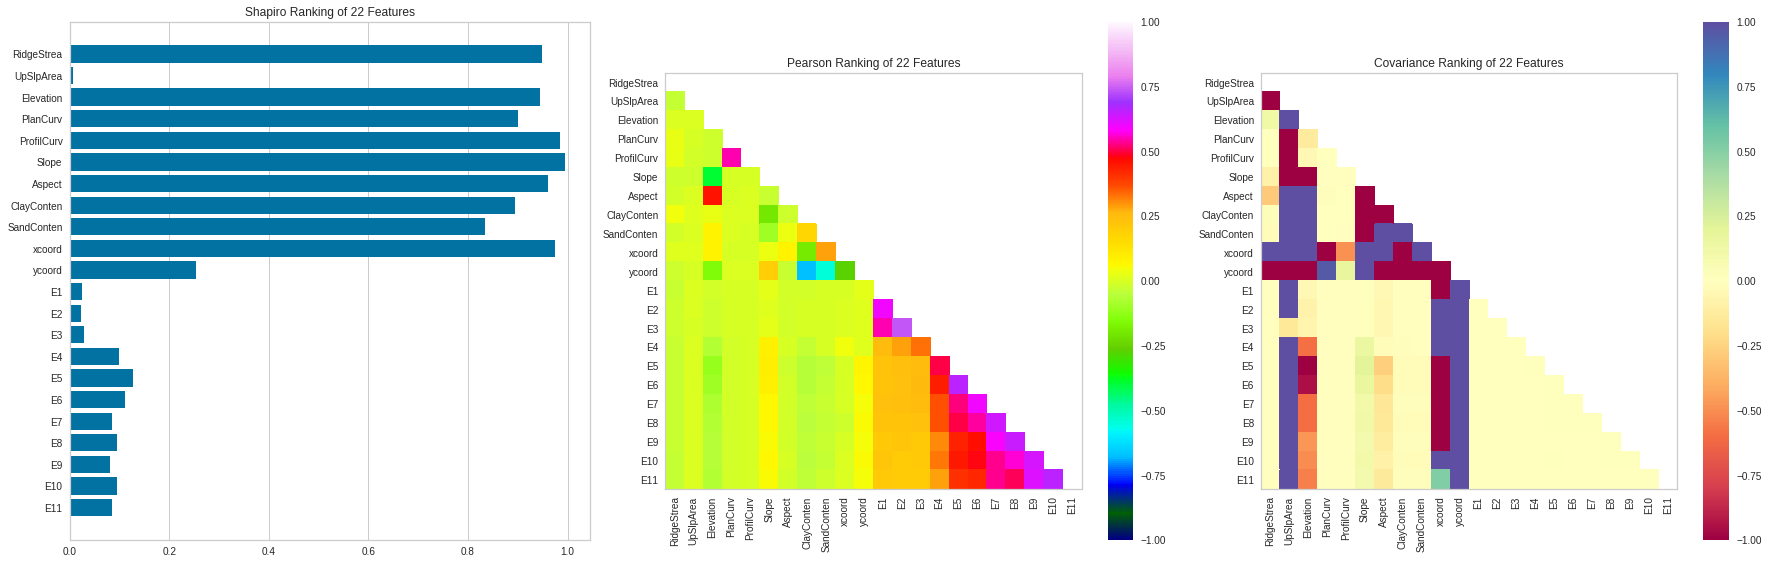

In [ ]:
from yellowbrick.features import *
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=3, figsize=(25,8))

colormap = "gist_ncar"
rank1d(df, ax=axes[0], show=False, colormap=colormap) # https://www.spss-tutorials.com/spss-shapiro-wilk-test-for-normality/
rank2d(df, algorithm='pearson', ax=axes[1], show=False, colormap=colormap)
rank2d(df, algorithm='covariance', ax=axes[2], show=False, colormap="Spectral") # JOINT VARIABILITY - measure of how two random variables in a data set will change together;
                                                           # A positive covariance means that the two variables at hand are positively related, and they move in the same direction. 
                                                           # A negative covariance means that the variables are inversely related, or that they move in opposite directions.

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Workfolder/Work_tech/sajag_nepal/Sindhupalchok_pilot_study/GIS_data/susceptibility/ML_parameters_weighting/data/output/pngs/data_correlations.png', dpi=300)
plt.show()

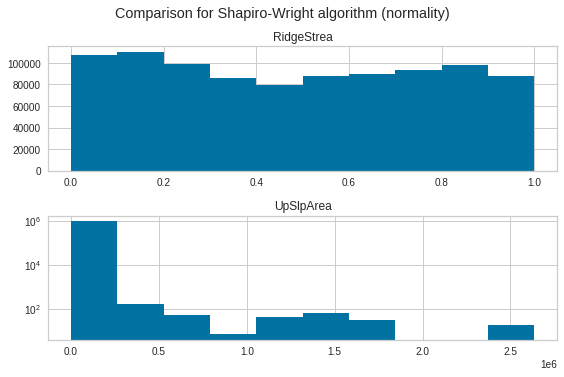

In [ ]:
fig, axs = plt.subplots(2)
fig.suptitle('Comparison for Shapiro-Wright algorithm (normality)')

axs[0].hist(df.RidgeStrea)
axs[0].set_title("RidgeStrea")
axs[1].hist(df.UpSlpArea)
axs[1].set_title("UpSlpArea")
axs[1].set_yscale('log')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

the target is : E1 for event : Pre-monsoon 2014
the target is : E2 for event : Post-monsoon 2014
the target is : E3 for event : Pre-earthquake 2015
the target is : E4 for event : Coseismic 2015
the target is : E5 for event : Post-monsoon 2015
the target is : E6 for event : Pre-monsoon 2016
the target is : E7 for event : Post-monsoon 2016
the target is : E8 for event : Pre-monsoon 2017
the target is : E9 for event : Post-monsoon 2017
the target is : E10 for event : Pre-monsoon 2018
the target is : E11 for event : Post-monsoon 2018



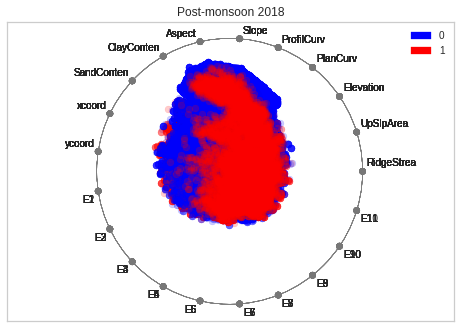

In [ ]:
from tqdm.notebook import tqdm

targets = ["E1", "E2", "E3", "E4", "E5", "E6", "E7", "E8", "E9", "E10", "E11"]
events = ["Pre-monsoon 2014", "Post-monsoon 2014", "Pre-earthquake 2015",
          "Coseismic 2015", "Post-monsoon 2015", "Pre-monsoon 2016",
          "Post-monsoon 2016", "Pre-monsoon 2017", "Post-monsoon 2017",
          "Pre-monsoon 2018", "Post-monsoon 2018"]

# Each dimension in the dataset is represented by a dimensional anchor, 
# and each dimensional anchor is distributed evenly on a unit circle. 
# Each line in the data set corresponds to a point in the projection, 
# that is linked to every dimensional anchor by a spring. 
# Each spring’s stiffness corresponds to the value for that particular thing in that particular dimension. 
# The position of the point is defined as the point in the 2D space where the spring’s tension is minimum.

for p,t in tqdm(enumerate(targets)):
  tar = df[t]
  fea = df.drop([t], axis=1)
  names = list(fea.columns)

  # Specify the target classes
  classes = [0, 1]

  # Instantiate the visualizer
  print("the target is : {} for event : {}".format(t, events[p]))
  radviz(fea, tar, classes=classes, features=names, colormap="bwr", alpha=0.2, show=False) # https://cran.r-project.org/web/packages/Radviz/vignettes/single_cell_projections.html
  plt.title("{}".format(events[p]))
  plt.savefig('/content/drive/MyDrive/Workfolder/Work_tech/sajag_nepal/Sindhupalchok_pilot_study/GIS_data/susceptibility/ML_parameters_weighting/data/output/pngs/{}.png'.format(p), dpi=300)

In [ ]:
from tqdm.notebook import tqdm, trange

targets = ["E1", "E2", "E3", "E4", "E5", "E6", "E7", "E8", "E9", "E10", "E11"]
events = ["E1 - Pre-monsoon 2014", "E2 - Post-monsoon 2014", "E3 - Pre-earthquake 2015",
          "E4 - Coseismic 2015", "E5 - Post-monsoon 2015", "E6 - Pre-monsoon 2016",
          "E7 - Post-monsoon 2016", "E8 - Pre-monsoon 2017", "E9 - Post-monsoon 2017",
          "E10 - Pre-monsoon 2018", "E11 - Post-monsoon 2018"]

#RADVIZ
# Each dimension in the dataset is represented by a dimensional anchor, 
# and each dimensional anchor is distributed evenly on a unit circle. 
# Each line in the data set corresponds to a point in the projection, 
# that is linked to every dimensional anchor by a spring. 
# Each spring’s stiffness corresponds to the value for that particular thing in that particular dimension. 
# The position of the point is defined as the point in the 2D space where the spring’s tension is minimum.

subset = df.iloc[:, 0:11]

for c in trange(12, 22, 1):
  target_epoch = df.iloc[:, c]
  previous_epoch = df.iloc[:, c-1]
  subset["Previous landsliding"] = previous_epoch
  
  names_fea = list(subset.columns)

  # Specify the target classes
  classes = [0, 1]

  # Instantiate the visualizer
  print("the target is : {}; {} --- with previous event : {}".format(df.iloc[:, c].name, events[c-11], df.iloc[:, c-1].name))
  radviz(subset, target_epoch, classes=classes, features=names_fea, colormap="bwr", alpha=0.2, show=False) # https://cran.r-project.org/web/packages/Radviz/vignettes/single_cell_projections.html
  plt.title("{}--{}".format(df.iloc[:, c].name, events[c-11]))
  plt.savefig('/content/drive/MyDrive/Workfolder/Work_tech/sajag_nepal/Sindhupalchok_pilot_study/GIS_data/susceptibility/ML_parameters_weighting/data/output/pngs/targeted_{}.png'.format(c-11), dpi=300)
  plt.close()

the target is : E2; E2 - Post-monsoon 2014 --- with previous event : E1
the target is : E3; E3 - Pre-earthquake 2015 --- with previous event : E2
the target is : E4; E4 - Coseismic 2015 --- with previous event : E3
the target is : E5; E5 - Post-monsoon 2015 --- with previous event : E4
the target is : E6; E6 - Pre-monsoon 2016 --- with previous event : E5
the target is : E7; E7 - Post-monsoon 2016 --- with previous event : E6
the target is : E8; E8 - Pre-monsoon 2017 --- with previous event : E7
the target is : E9; E9 - Post-monsoon 2017 --- with previous event : E8
the target is : E10; E10 - Pre-monsoon 2018 --- with previous event : E9
the target is : E11; E11 - Post-monsoon 2018 --- with previous event : E10



In [ ]:
from pathlib import Path
import os
import imageio
from tqdm.notebook import tqdm

r = "/content/drive/MyDrive/Workfolder/Work_tech/sajag_nepal/Sindhupalchok_pilot_study/GIS_data/susceptibility/ML_parameters_weighting/data/output/pngs"
images = []
directory = Path(r)

for filename in tqdm(directory.rglob('targeted_*.png')): # sorted(directory.rglob('*.png'))
    # print(filename)
    images.append(imageio.imread(filename))

imageio.mimsave(directory / 'targeted_Epochs_Radviz.gif', images, fps=0.5)

# Learning

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Create train and test dataset
target = "E1"
y = df[target]
features = df.drop((df.filter(regex='E').columns), axis = 1)

# Normalized datatset
X = MinMaxScaler().fit_transform(features)

# Create the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=42)
n_features = X.shape[1]

In [ ]:
print("X_train :{}, y_train:{}, X_test:{}, y_test:{} \n for the features : {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape, features.columns))

X_train :(704647, 10), y_train:(704647,), X_test:(234883, 10), y_test:(234883,) 
 for the features : Index(['RidgeStrea', 'UpSlpArea', 'PlanCurv', 'ProfilCurv', 'Slope', 'Aspect',
       'ClayConten', 'SandConten', 'xcoord', 'ycoord'],
      dtype='object')


In [ ]:
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


models = [ 
    LinearSVC(),
    # SGDClassifier(max_iter=100, tol=1e-3), 
    # KNeighborsClassifier(),
    LogisticRegression(solver='lbfgs', max_iter=2000), 
    # LogisticRegressionCV(cv=3, max_iter=2000),
    # BaggingClassifier(), 
    # ExtraTreesClassifier(n_estimators=300),
    # GaussianNB(),
    RandomForestClassifier(n_estimators=300)
]


def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y) # useful???????

    model = Pipeline([
        ('one_hot_encoder', OneHotEncoder()),
        ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)

    expected  = y
    predicted = model.predict(X)

    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))

for model in models:
    score_model(X, y, model)


LinearSVC: 0.7767878641945581
LogisticRegression: 0.3749187784275504
RandomForestClassifier: 1.0


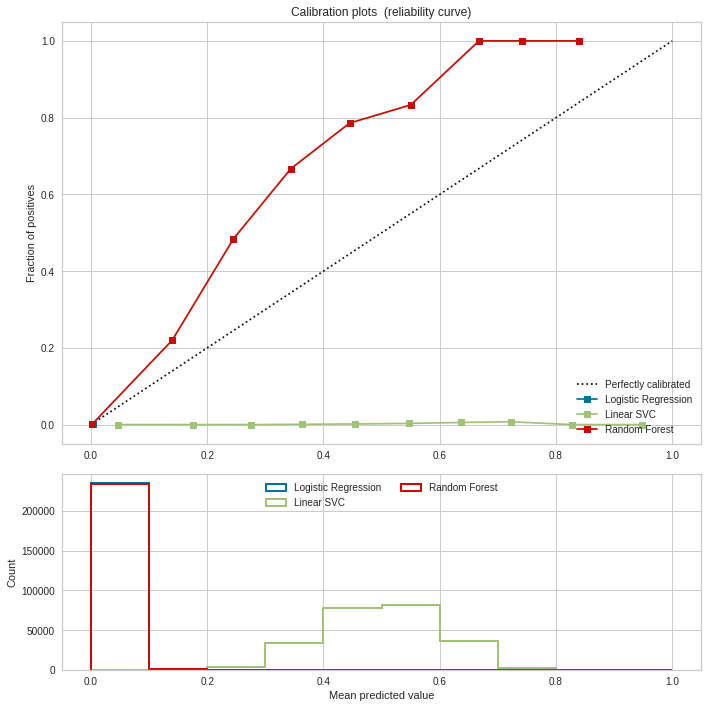

In [29]:
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve


# Create classifiers
lr = LogisticRegression(solver='lbfgs', max_iter=3000)
svc = LinearSVC(C=1.0)
rfc = RandomForestClassifier(n_estimators=500)


# #############################################################################
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(lr, 'Logistic Regression'),
                  (svc, 'Linear SVC'),
                  (rfc, 'Random Forest')]:
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

In [45]:
features

,RidgeStrea,UpSlpArea,PlanCurv,ProfilCurv,Slope,Aspect,ClayConten,SandConten,xcoord,ycoord
0,0.955,0.0,0.442,0.056,24.170,198.435,9.725,49.002,378654.441,3117259.605
1,0.937,1.0,0.080,0.001,53.639,206.030,9.725,49.002,378704.441,3117259.605
2,0.878,22.0,0.000,0.000,24.170,198.435,9.725,49.002,378754.441,3117259.605
3,0.834,3.0,0.003,-0.033,28.305,198.435,9.725,49.002,378804.441,3117259.605
4,0.829,13.0,-0.162,-0.009,14.245,206.565,9.741,48.604,378854.441,3117259.605
...,...,...,...,...,...,...,...,...,...,...
939525,0.057,3.0,0.056,0.003,70.118,305.811,11.842,53.209,389954.441,3055009.605
939526,0.076,3.0,0.080,0.004,23.912,219.806,12.018,52.809,389704.441,3054959.605
939527,0.133,5.0,-0.187,-0.030,26.920,243.435,12.018,52.809,389754.441,3054959.605
939528,0.159,1.0,-0.019,0.078,30.068,258.690,12.018,52.809,389804.441,3054959.605


In [44]:
# test which features are the most important in the learning process
from sklearn.inspection import permutation_importance

# model = RandomForestClassifier(n_estimators=500).fit(X_train, y_train)

# r = permutation_importance(model, X_test, y_test,
#                            n_repeats=10,
#                            random_state=42)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print("{}: importances mean: {}; importance std: {}".format(features.columns[i], 
                                     r.importances_mean[i], 
                                     r.importances_std[i]))
        
        # print("{} -- {} --{}".format(features[i], 
        #                              r.importances_mean[i], 
        #                              r.importances_std[i]))

xcoord: importances mean: 0.00016689160135051616; importance std: 3.711549106213448e-06
ycoord: importances mean: 0.00016391139418353573; importance std: 3.432456903383043e-06
ClayConten: importances mean: 0.0001387925052047656; importance std: 1.1920828667878944e-05
SandConten: importances mean: 0.00013708952968077837; importance std: 8.472196260317298e-06
Aspect: importances mean: 8.216856903229264e-05; importance std: 1.4126743972967574e-05
RidgeStrea: importances mean: 6.811902095942291e-05; importance std: 8.514877619925087e-06
Slope: importances mean: 4.342587586163571e-05; importance std: 9.481766433199012e-06


In [48]:
X_test.transpose().shape

(234883, 10)

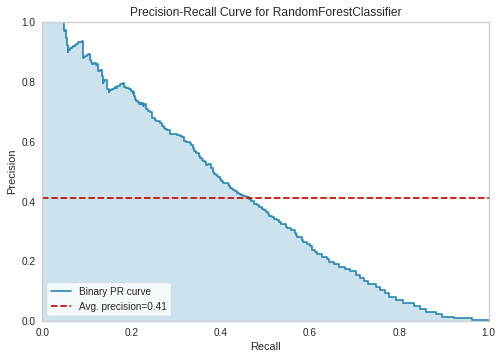

In [49]:
# Instaniate the classification model and visualizer
import matplotlib.pyplot as plt
from yellowbrick.classifier import PrecisionRecallCurve

# !! model is inherited from previous cell

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(model)
viz.fit(X_train, y_train)
viz.score(X_test.transpose(), y_test)
viz.show()

## Optimizers

In [ ]:
# # optimise ML
# !pip install scikit-optimize

In [ ]:
# # report scikit-optimize version number
# import skopt
# print('skopt %s' % skopt.__version__)

In [ ]:
# from skopt import BayesSearchCV
# from skopt.space import Real, Categorical, Integer
# from skopt.plots import plot_objective, plot_histogram

# # pipeline class is used as estimator to enable
# # search over different model types
# pipe = Pipeline([
#     ('model', LinearSVC())
# ])

# # single categorical value of 'model' parameter is
# # sets the model class
# # We will get ConvergenceWarnings because the problem is not well-conditioned.
# # But that's fine, this is just an example.
# linsvc_search = {
#     'model': [LinearSVC(max_iter=1000)],
#     'model__C': (1e-6, 1e+6, 'log-uniform'),
# }

# # explicit dimension classes can be specified like this
# svc_search = {
#     'model': Categorical([SVC()]),
#     'model__C': Real(1e-6, 1e+6, prior='log-uniform'),
#     'model__gamma': Real(1e-6, 1e+1, prior='log-uniform'),
#     'model__degree': Integer(1,8),
#     'model__kernel': Categorical(['linear', 'poly', 'rbf']),
# }

# opt = BayesSearchCV(
#     pipe,
#     # (parameter space, # of evaluations)
#     [(svc_search, 40), (linsvc_search, 16)],
#     cv=3
# )

# opt.fit(X_train, y_train)

# print("val. score: %s" % opt.best_score_)
# print("test score: %s" % opt.score(X_test, y_test))
# print("best params: %s" % str(opt.best_params_))